# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [3]:
apple=pd.read_csv("C:/Users/Vishal/Desktop/Python/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Apple Stock files/appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [4]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date']=pd.to_datetime(apple.Date,format="%Y-%m-%d")

In [7]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [23]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


In [24]:
apple.set_index('Date',inplace=True)

In [25]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


### Step 7.  Is there any duplicate dates?

In [8]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [9]:
apple.Date.duplicated().head()

0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool

In [ ]:
## Dropping Duplicates if any

In [10]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


In [11]:
apple.drop_duplicates('Date').head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [12]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


### Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [13]:
apple.sort_values('Date').head()

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [14]:
from pandas.tseries.offsets import BMonthEnd
from datetime import date

In [15]:
offset = BMonthEnd()

In [16]:
pd.Series(map(lambda x: offset.rollforward(x),apple.Date))

0      2014-07-31
1      2014-07-31
2      2014-07-31
3      2014-07-31
4      2014-07-31
5      2014-06-30
6      2014-06-30
7      2014-06-30
8      2014-06-30
9      2014-06-30
10     2014-06-30
11     2014-06-30
12     2014-06-30
13     2014-06-30
14     2014-06-30
15     2014-06-30
16     2014-06-30
17     2014-06-30
18     2014-06-30
19     2014-06-30
20     2014-06-30
21     2014-06-30
22     2014-06-30
23     2014-06-30
24     2014-06-30
25     2014-06-30
26     2014-05-30
27     2014-05-30
28     2014-05-30
29     2014-05-30
          ...    
8435   1981-01-30
8436   1981-01-30
8437   1981-01-30
8438   1981-01-30
8439   1981-01-30
8440   1981-01-30
8441   1981-01-30
8442   1981-01-30
8443   1981-01-30
8444   1981-01-30
8445   1981-01-30
8446   1981-01-30
8447   1981-01-30
8448   1981-01-30
8449   1981-01-30
8450   1981-01-30
8451   1981-01-30
8452   1980-12-31
8453   1980-12-31
8454   1980-12-31
8455   1980-12-31
8456   1980-12-31
8457   1980-12-31
8458   1980-12-31
8459   198

### Step 10.  What is the difference in days between the first day and the oldest

In [17]:
last=apple['Date'].iloc[-1]

In [18]:
first=apple['Date'].iloc[0]

In [19]:
Days=first-last
print(Days.days)

12261


### Step 11.  How many months in the data we have?

In [20]:
Year=0
Month=0
Count=0
for x in apple.Date:
    if ((x.year!=Year)|(x.month!=Month)):
        Count+=1
        print(x)
    Year=x.year
    Month=x.month
        
print("Total number of unique months with respect to year are",Count)    

2014-07-08 00:00:00
2014-06-30 00:00:00
2014-05-30 00:00:00
2014-04-30 00:00:00
2014-03-31 00:00:00
2014-02-28 00:00:00
2014-01-31 00:00:00
2013-12-31 00:00:00
2013-11-29 00:00:00
2013-10-31 00:00:00
2013-09-30 00:00:00
2013-08-30 00:00:00
2013-07-31 00:00:00
2013-06-28 00:00:00
2013-05-31 00:00:00
2013-04-30 00:00:00
2013-03-28 00:00:00
2013-02-28 00:00:00
2013-01-31 00:00:00
2012-12-31 00:00:00
2012-11-30 00:00:00
2012-10-31 00:00:00
2012-09-28 00:00:00
2012-08-31 00:00:00
2012-07-31 00:00:00
2012-06-29 00:00:00
2012-05-31 00:00:00
2012-04-30 00:00:00
2012-03-30 00:00:00
2012-02-29 00:00:00
2012-01-31 00:00:00
2011-12-30 00:00:00
2011-11-30 00:00:00
2011-10-31 00:00:00
2011-09-30 00:00:00
2011-08-31 00:00:00
2011-07-29 00:00:00
2011-06-30 00:00:00
2011-05-31 00:00:00
2011-04-29 00:00:00
2011-03-31 00:00:00
2011-02-28 00:00:00
2011-01-31 00:00:00
2010-12-31 00:00:00
2010-11-30 00:00:00
2010-10-29 00:00:00
2010-09-30 00:00:00
2010-08-31 00:00:00
2010-07-30 00:00:00
2010-06-30 00:00:00


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [21]:
from matplotlib.pyplot import figure

(array([6451.,  543.,  375.,  142.,  185.,  164.,  151.,  202.,  175.,
          77.]),
 array([ 0.17 ,  9.781, 19.392, 29.003, 38.614, 48.225, 57.836, 67.447,
        77.058, 86.669, 96.28 ]),
 <a list of 10 Patch objects>)

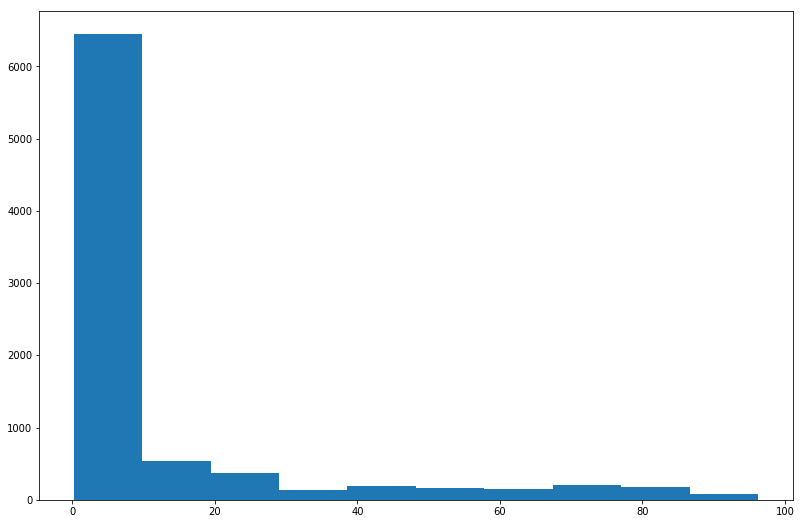

In [22]:
plt.figure(figsize=(13.5,9))
plt.hist(apple['Adj Close'])